## DSN Pre-Bootcamp Hackathon: Expresso Churn Prediction Challenge by Data Science Nigeria

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
import random
warnings.filterwarnings("ignore")
warnings.simplefilter(action= 'ignore', category= FutureWarning)
pd.set_option('display.max_columns', 200)

SEED = 0

random.seed(SEED)
np.random.seed(SEED)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data

In [2]:
train = pd.read_csv('data/Train.csv')
print(train.shape)
train.head(3)

(400000, 19)


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0


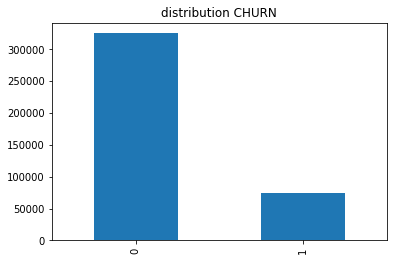

In [3]:
train['CHURN'].value_counts().plot.bar(title= 'distribution CHURN')
plt.show()

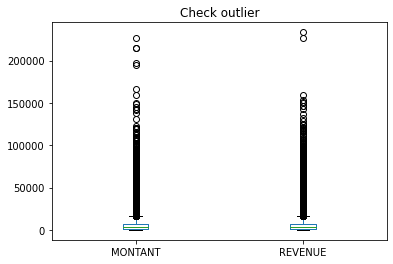

In [4]:
train[['MONTANT', 'REVENUE']].plot.box(title= 'Check outlier')
plt.show()

In [5]:
test = pd.read_csv('data/Test.csv')
print(test.shape)
test.head(3)

(100000, 18)


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0


In [6]:
submission = pd.read_csv('data/sample_submission.csv')

## Correlation between CHURN

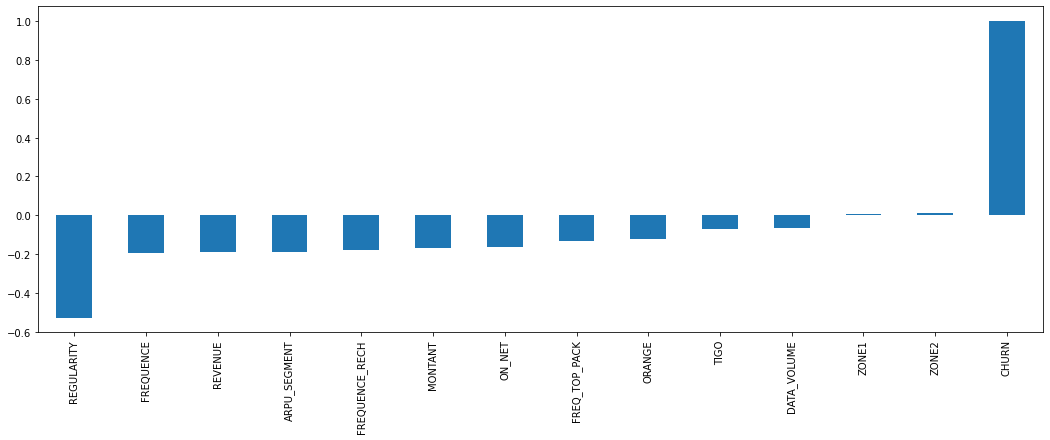

In [7]:
train.corr(method= 'spearman')['CHURN'].sort_values().plot(kind='bar', figsize=(18, 6))
plt.show()

In [8]:
train['is_train'] = 1
test['is_train'] = 0

all_data = pd.concat([train, test])
all_data.tail(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,is_train
99997,a2f84faffbc995bd0e2d726fa4ffdb93f11646ed,NaN,I 18-21 month,1800.0,7.0,1799.0,600.0,9.0,81.0,2.0,0.0,NaN,NaN,NaN,NO,60,"Data:200F=Unlimited,24H",5.0,NaN,0
99998,afa76e894df4201fc77eb714de7d1f262299611a,THIES,K > 24 month,2500.0,4.0,2515.0,838.0,4.0,NaN,43.0,106.0,4.0,NaN,NaN,NO,16,All-net 500F=2000F;5d,5.0,NaN,0
99999,c08a2d84b87c1f5d4bb318114f508b77aa8e2663,MATAM,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,7,NaN,NaN,NaN,0


## Checking for NaN values

In [9]:
all_data.isnull().sum()/all_data.shape[0]

user_id           0.000000
REGION            0.393626
TENURE            0.000000
MONTANT           0.350456
FREQUENCE_RECH    0.350456
REVENUE           0.336306
ARPU_SEGMENT      0.336306
FREQUENCE         0.336306
DATA_VOLUME       0.492384
ON_NET            0.364404
ORANGE            0.415034
TIGO              0.598348
ZONE1             0.921260
ZONE2             0.936130
MRG               0.000000
REGULARITY        0.000000
TOP_PACK          0.418064
FREQ_TOP_PACK     0.418064
CHURN             0.200000
is_train          0.000000
dtype: float64

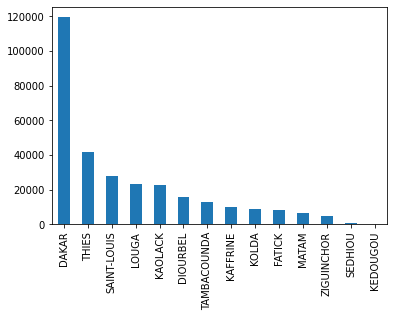

In [10]:
all_data['REGION'].value_counts().plot.bar()

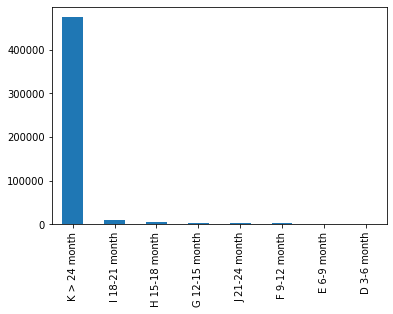

In [11]:
all_data['TENURE'].value_counts().plot.bar()
plt.show()

## Features Engineering

In [12]:
#add dummies encoding for the features TENURE and REGION
all_data = pd.concat([all_data, pd.get_dummies(all_data['TENURE'], prefix= 'TENURE', drop_first= True)], axis= 1)
all_data = pd.concat([all_data, pd.get_dummies(all_data['REGION'], prefix= 'REGION', drop_first= True)], axis= 1)

In [13]:
#add one hot encoding => REGION and count encoding for other categorical features
all_data['REGION'] = all_data['REGION'].factorize()[0]
all_data['TENURE'] = all_data['TENURE'].map(all_data['TENURE'].value_counts())
all_data['TOP_PACK'] = all_data['TOP_PACK'].map(all_data['TOP_PACK'].value_counts())
all_data['MRG'] = all_data['MRG'].map(all_data['MRG'].value_counts())

In [14]:
all_data['TF'] = all_data['REGULARITY'] * all_data['FREQUENCE']
all_data['MR'] = all_data['MONTANT'] - all_data['REVENUE']

In [15]:
all_train = all_data.loc[all_data['is_train']==1]
all_test = all_data.loc[all_data['is_train']==0]

### Model

In [16]:
from catboost import CatBoostClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, log_loss
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

In [17]:
features = [c for c in all_train.columns if c not in ['CHURN', 'user_id', 'is_train']]

In [18]:
err = list()
    
preds_df = pd.DataFrame()
preds_df['user_id'] = all_test['user_id']
preds_df['CHURN'] = np.zeros(len(all_test))

fold = StratifiedKFold(n_splits= 3, shuffle= True, random_state= 0)

i = 1

#Standardize
scaler = StandardScaler()

for train_index, test_index in fold.split(all_train[features], all_train['CHURN']):

    print('fold n°: ', i)

    x_data, x_val = all_train[features].iloc[train_index], all_train[features].iloc[test_index]

    y_data, y_val = all_train['CHURN'].iloc[train_index], all_train['CHURN'].iloc[test_index]
        
    #x_data, y_data = smote.fit_sample(x_data, y_data)
    
    scaler.fit(x_data)
    
    x_data = scaler.transform(x_data)
    x_val = scaler.transform(x_val)
    x_test = scaler.transform(all_test[features])
    
  
    model = CatBoostClassifier(learning_rate= 0.10001, random_state= 0, num_trees= 500, max_depth= 5)
    
    model.fit(x_data, y_data, eval_set= [(x_val, y_val)], early_stopping_rounds= 300, verbose= 100)
        
    y_train_pred = model.predict_proba(x_data)

    y_test_pred = model.predict_proba(x_val)
        
    print('log_loss train', log_loss(y_data, y_train_pred))
    print('log_loss test', log_loss(y_val, y_test_pred))
    
    err.append(log_loss(y_val, y_test_pred))
    
    current_pred = model.predict_proba(x_test)[:,1]
        
    preds_df['CHURN'] += current_pred / fold.n_splits
        
    i = i + 1
        
print('Mean Log_loss test: ', np.mean(err))  

preds_df.head()

fold n°:  1
0:	learn: 0.5514671	test: 0.5509314	best: 0.5509314 (0)	total: 104ms	remaining: 52.1s
100:	learn: 0.2516710	test: 0.2531028	best: 0.2531028 (100)	total: 4.72s	remaining: 18.6s
200:	learn: 0.2499684	test: 0.2526482	best: 0.2526482 (200)	total: 9.27s	remaining: 13.8s
300:	learn: 0.2486568	test: 0.2525002	best: 0.2524883 (287)	total: 13.8s	remaining: 9.12s
400:	learn: 0.2475430	test: 0.2524757	best: 0.2524612 (372)	total: 18.4s	remaining: 4.53s
499:	learn: 0.2465758	test: 0.2525615	best: 0.2524612 (372)	total: 22.9s	remaining: 0us

bestTest = 0.2524612311
bestIteration = 372

Shrink model to first 373 iterations.
log_loss train 0.24785617634598073
log_loss test 0.2524612310601892
fold n°:  2
0:	learn: 0.5506893	test: 0.5510373	best: 0.5510373 (0)	total: 52.7ms	remaining: 26.3s
100:	learn: 0.2519172	test: 0.2527085	best: 0.2527085 (100)	total: 4.71s	remaining: 18.6s
200:	learn: 0.2503072	test: 0.2519471	best: 0.2519471 (200)	total: 9.48s	remaining: 14.1s
300:	learn: 0.2490508	t

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.783827
1,5335efd940280b82143272275637d1e65d37eadb,0.661619
2,a581f4fa08677c26f83f643248c667e241043086,0.129923
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.000752
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.000188


### Submit

In [19]:
preds_df.to_csv('data/res/submission.csv', index= False)

#### LB: 0.2467xxx

## Note
In this notebook, we just show the basic techniques to improve a Machine Learning model. However, more in-depth data analysis will be helpful to get a better result.
### process included in the notebook
- basic Exploratory Data Analysis
- handle categorical features 
- basic  features engineering
- cross validation

### possible improvement
- EDA improvement
- handle outlier
- features selection
- Stacking method

If you have any questions or suggestions do not hesitate to contact me on [linkedin](http://www.linkedin.com/in/mahanamana)